<a href="https://colab.research.google.com/github/AlexeyTri/Mathematics/blob/main/Mathematics_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math as m
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt

In [ ]:
import sympy
from sympy import *

# Функции для раздела "Линейная алгебра и Аналитическая геометрия"

In [ ]:
# distance_line() находит расстояние медлу двумя прямыми(в том числе скрещивающимися)

def distance_line(A, B, M, N):
    """
    A, B, M, N - точки
    Функция наход расстояние между прямыми AB-MN
    """
    AB = Point(B.x-A.x, B.y-A.y, B.z-A.z)

    l1 = Line(A, B)
    l2 = Line(M, N)

    """
    Плоскостсь, проходящая через точку А, перпендикулярная прямой АВ
    """
    p = Plane(A, normal_vector=AB)

    """
    Проекция прямой MN на плоскость p
    """
    p_l2 = p.projection(l2)

    """
    Расстояние от точки А до прямой p_l2
    """

    d = p_l2.distance(A)
    return d

In [ ]:
# Point_onside_L() возвращает True, если точки A, B лежат по одну сторону от прямой l
def Point_oneside_L(A, B, l):
    s = Segment(A, B)
    return not(Line.are_concurrent(l, s))

In [ ]:
# Point_oneside_P() возвращает True, если точки A, B лежат по одну сторону от плоскости P
def Point_oneside_P(A, B, P):
    s = Segment(A, B)
    p = P.interseptiont(s)

    if len(p) == 0:
        return True
    else:
        return not(s.contains(p[0]))

In [ ]:
# Point_opposite_l() возвращает координаты точки, симметричной относительно заданной прямой (на плоскости или в пространстве)

def Point_opposite_l(A, l):
    A0 = l.projection(A)

    x = 2*A0.x - A.x
    y = 2*A0.y - A.y

    if len(A)==2:
        return Point(x, y)
    elif len(A) == 3:
        z = 2*A0.z - A.z

        return Point(x, y, z)

In [ ]:
# Point_opposite_P() возвращает координаты точки, симметричной относительно заданной плоскости

def Point_opposite_P(A, P):
    A0 = l.projection(A)

    x = 2*A0.x - A.x
    y = 2*A0.y - A.y
    z = 2*A0.z - A.z

    return Point(x, y, z)

In [ ]:
# Conic_curve() по данным коэффициентам уравнения кривой второго порядка определяет тип кривой и
# выполняет преобразование поворота для устранения слагаемого, содержащего произведение переменных

def conic_curve(A, a, f_transform=0):
    """
    A - матрица, содержащая коэффициенты квадратичной формы
    а - вектор, содержащий коэффициенты при переменных 1-й степени и свободный член
    f_transform != 0 - дополнительно выводит формулы перехода к каноническому виду
    """

    if (A.shape() != (2,2) or (len(a) != 3)):
        return ValueError("Неверный размер матриц A, a")

    a11 = A[0, 0], a12 = A[0, 1], a22 = A[1, 1]
    a1 = a[0], a2 = a[1], a0 = a[2]

    D = det(A)
    Delta = det(Matrix([[a11, a12, a1],
                        [a12, a22, a2],
                        [a1, a2, a0]]))

    I = a11 + a22
    B = det(Matrix([[a11, a1],
                    [a1, a0]])) +\
        det(Matrix([[a22, a2],
                    [a2, a0]]))

    if (Delta*I < 0) and (D > 0):
        print("Эллипс")

    if (Delta != 0) and (D < 0):
        print("Гипербола")

    if (Delta != 0) and (D == 0):
        print("Парабола")

    if (Delta == 0) and (D < 0):
        print("Пара пересекающихся прямых")

    if (Delta == 0) and (D == 0) and (B < 0):
        print("Пара параллельных прямых")

    if (Delta == 0) and (D == 0) and (B == 0):
        print("Прямая")

    if (Delta == 0) and (D > 0) and (B == 0):
        print("Точка")

    if (Delta*I > 0) and (D > 0):
        print("Мнимый эллипс")

    if (Delta == 0) and (D == 0) and (B > 0):
        print("Пара мнимых параллельных прямых")


    """
    Поворот системы координат для устранения слагаемого x*y
    """

    T, _ = A.diagonalize()
    T1 = T.inv()
    n1 = sqrt(T1[0, 0]**2 + T1[1, 0]**2)
    n2 = sqrt(T1[0, 1]**2 + T1[1, 1]**2)
    x, y, x1,y1 = symbols('x y x1 y1')
    """Исходное уравнение кривой"""
    Q0 = a11*x**2 + 2*a12*x*y + a22*y**2 + 2*a1*x + 2*a2*y + a0
    x0 = (T1[0, 0]/n1)*x1 + (T1[1, 0]/n1)*y1
    y0 = (T1[0, 1]/n2)*x1 + (T1[1, 1]/n2)*y1
    """Уравнение кривой после поворота"""
    Q = Q0.subs({x: x0, y: y0}).simplify()

    if (f_transform == 0):
        print("Уравнение: %s" % Q)
    else:
        print("Уравнение: %s" % Q)
        print("Формулы перехода")
        print('x = %s' % x0)
        print('y = %s' % y0)

In [ ]:
# conic_surface() - по данным коэффициентам уравнения поверхности второго порядка определяет тип поверхности и
# выполняет преобразование поворота для устранения слагаемых, содержащих произведение переменных

def conic_surface(A, a, f_transform=0):
    """
    A - матрица, содержащая коэффициенты квадратичной формы
    а - вектор, содержащий коэффициенты при переменных 1-й степени и свободный член
    f_transform != 0 - дополнительно выводит формулы перехода к каноническому виду
    """

    a11 = A[0, 0], a12 = A[0, 1], a13 = A[0, 2]
    a22 = A[1, 1], a23 = A[1, 2], a33 = A[2, 2]
    a1 = a[0], a2 = a[1], a3 = a[2], a0 = a[3]

    D = det(Matrix([[a11, a12, a13],
                    [a12, a22, a23],
                    [a13, a23, a33]]))

    Delta = det(Matrix([[a11, a12, a13, a1],
                        [a12, a22, a23, a2],
                        [a13, a23, a33, a3],
                        [a1,  a2,  a3,  a0]]))

    I1 = a11 + a22 + a33
    I2 = det(Matrix([[a11, a12],
                     [a12, a22]])) + \
         det(Matrix([[a11, a13],
                     [a13, a33]])) + \
         det(Matrix([[a22, a23],
                     [a23, a33]]))

    K1 = det(Matrix([[a11, a1],
                     [a1, a0]])) + \
         det(Matrix([[a22, a2],
                     [a2, a0]])) + \
         det(Matrix([[a33, a3],
                     [a3, a0]]))

    K2 = det(Matrix([[a11, a12, a1],
                     [a12, a22, a2],
                     [a1, a2, a0]])) + \
         det(Matrix([[a11, a13, a1],
                     [a13, a33, a3],
                     [a1, a3, a0]])) + \
         det(Matrix([[a22, a23, a2],
                     [a23, a33, a3],
                     [a2, a3, a0]]))


    if (D != 0) and (Delta < 0) and (I2 > 0) and (I1*D > 0):
        print("Эллипсоид")

    if (D != 0) and (Delta > 0) and (I2 > 0) and (I1*D > 0):
        print("Мнимый элипсоид")

    if (D != 0) and (Delta == 0) and (I2 > 0) and (I1*D > 0):
        print("Мнимый конус")

    if (D != 0) and (Delta > 0) and ((I2 <= 0) or (I1*D <= 0)):
        print("Однополосный гиперболоид")

    if (D != 0) and (Delta < 0) and ((I2 <= 0) or (I1*D <= 0)):
        print("Конус")

    if (D == 0) and (Delta == 0) and (I2 > 0) and (I1*K2 < 0):
        print("Элиптический цилиндр")

    if (D == 0) and (Delta == 0) and (I2 > 0) and (I1*K2 > 0):
        print("Мнимый элиптический цилиндр")

    if (D == 0) and (Delta == 0) and (I2 > 0) and (K2 == 0):
        print("Пара мнимых пересекающихся плоскостей")

    if (D == 0) and (Delta == 0) and (I2 < 0) and (K2 != 0):
        print("Гиперболический цилиндр")

    if (D == 0) and (Delta == 0) and (I2 < 0) and (K2 == 0):
        print("Пара пересекающихся плоскостей")

    if (D == 0) and (Delta == 0) and (I2 == 0) and (K2 != 0):
        print("параболический цилиндр")

    if (D == 0) and (Delta == 0) and (I2 == 0) and (K2 == 0) and (K1 < 0):
        print("Пара параллельных плоскостей")

    if (D == 0) and (Delta == 0) and (I2 == 0) and (K2 == 0) and (K1 > 0):
        print("Пара мнимых параллельных плоскостей")


    """
    Поворот системы координат для устранения слагаемого x*y
    """

    T, _ = A.diagonalize()
    T1 = T.inv()
    n1 = sqrt(T1[0, 0]**2 + T1[1, 0]**2 + T1[2, 0]**2)
    n2 = sqrt(T1[0, 1]**2 + T1[1, 1]**2 + T1[2, 1]**2)
    n3 = sqrt(T1[0, 2]**2 + T1[1, 2]**2 + T1[2, 2]**2)
    x, y, z, x1,y1, z1 = symbols('x y z x1 y1 z1')
    """Исходное уравнение кривой"""
    Q0 = a11*x**2 + 2*a12*x*y + a22*y**2 + 2*a13*x*z + \
        2*a23*y*z + a33*z**2 + 2*a1*x + 2*a2*y + 2*a3*z + a0
    x0 = (T1[0, 0]/n1)*x1 + (T1[1, 0]/n1)*y1 + (T1[2, 0]/n1)*z1
    y0 = (T1[0, 1]/n2)*x1 + (T1[1, 1]/n2)*y1 + (T1[2, 1]/n2)*z1
    z0 = (T1[0, 2]/n3)*x1 + (T1[1, 2]/n3)*y1 + (T1[2, 2]/n3)*z1
    """Уравнение кривой после поворота"""
    Q = Q0.subs({x: x0, y: y0, z: z0}).simplify()

    if (f_transform == 0):
        print("Уравнение: %s" % Q)
    else:
        print("Уравнение: %s" % Q)
        print("Формулы перехода")
        print('x = %s' % x0)
        print('y = %s' % y0)



In [ ]:
# вычисление минора элемента матрицы n-го порядка.
# элемент матрицы задается его индексами: i - номер строки, j - номер столбца

def Minor_element(A, i, j):
    m, n = A.shape()
    if m != n:
        raise ValueError("Матрицы должна быть квадратной")

    if (0 < i <= n) & (0 < j <= n):
        A.row_del(i-1)
        A.col_del(j-1)
    else:
        raise ValueError("Индекс элемента превышает размер матрицы")
    return det(A)

In [ ]:
# вычисление алгебраичесого дополнения

def Algebr_compl(A, i, j):
    m = Minor_element(A, i, j)
    return (-1) ** (i+j) * m

In [ ]:
# вычисляет минор матрицы

def Minor_Matrix(A, row, col):
    n = len(row)
    m = len(col)

    if n != m:
        raise ValueError("Матрица должна быть квадратной")
    if (n < 1) or (n > A.shape[0]):

        raise ValueError("Неверное число строк минора")

    M_row = A.row(row[0] - 1)
    for i in range(1, n):
        M_row = M_row.row_insert(i, A.row(row[i] - 1))

    M_col = M_row.col(col[0] - 1)
    for j in range(1, m):
        M_col = M_col.col_insert(j, M_row.col(col[j]-1))

    return det(M_col)

In [ ]:
# возвращает подматрицу, образованную базисными строками и столбцами + ее определитель

def Basis_Minor(A):
    s_col = A.rref()[1]
    s_row = A.T.rref()[1]

    l = [0]
    for i in range(0, m):
        if i in s_row:
            pass
        else:
            A.row_del(i-l)
            l += 1

    l = 0
    for j in range(0, n):
        if j in s_col:
            pass
        else:
            A.col_del(j-1)
            l += 1

    return A, det(A)

In [ ]:
# использую критерий Ссильвестра, определяет является ли матрица положительно определенной, отрицательно определенной и неоприделенной

def silvestr(A):
    m, n = A.shape
    if m != n:
        raise ValueError("Матрица должна быть квадратной")

    M1 = A[0,0]
    if M1 == 0:
        return("Не является знакопеременной")

    elif M1 > 0:
        for k in range(2, n+1):
            Mk = det(A[0: k, 0: k])
            if Mk <= 0:
                return("Не является знакопеременной")
        return("Положительно определена")
    else:
        for k in range(2, n+1):
            Mk = det(A[0: k, 0: k])
            if Mk == 0:
                return("Не является знакопеременной")
            else:
                s1 = M1/abs(M1)
                s2 = Mk/abs(Mk)
                if s1*s2 > 0:
                    return("Не является знакопеременной")
                M1 = Mk

        return("Отрицательно определена")

# Линейная алгебра и аналитическая геометрия

*n-мерный вектор*

$a=(a_1, a_2, ..., a_n)$

$a=
\begin{pmatrix}
a_1\\
a_2\\
...\\
a_n
\end{pmatrix}$

*Линейная комбинация векторов-разложение вектора e по векторам*

$e=λ_1e_1+λ_2e_2+...+λ_ne_n$


*Базис - система n-линейно независимых векторов пространства $ℝ^n$*

*разложение вектора a по базису:*

$a = a_1e_1+a_2e_2+...+a_ne_n$


*Модуль вектора*

$\sqrt{a_1^2+a_3^2+a_3^2+...+a_n^2}$

*Направляющие косинусы - косинусы углов, образованных векторов и положительными направлениями полуосей*
$a=(a_1, a_2)$
$coaα = \frac{a_1}{\sqrt{a_1^2+a_2^2}}, cosβ=\frac{a_2}{\sqrt{a_1^2+a_2^2}}$



# Семинар №1

*Примеры 1,2*

In [ ]:
# создание вектора
a = np.array([1,2,3,4,5])

In [ ]:
# элементы вектора
a[1], a[1:4], a[-1]

(np.int64(2), array([2, 3, 4]), np.int64(5))

In [ ]:
# действия над векторами
b = np.array([11, 12, 13, 14, 15])
a + b

array([12, 14, 16, 18, 20])

In [ ]:
# длина вектора
np.linalg.norm([3,4])

np.float64(5.0)

*Пример 3:* найти скалярное произведение векторов f, g

$
(f, g) = ∑f_ig_i
$

$
(f, g) = \frac{|f|*|g|}{cosα}
$

In [ ]:
# найти скалярноу произведение векторов f=(3, 1, 3) g=(0, -2, 1)

f = np.array([3, 1, 4])
g = np.array([0, -2, 1])
np.dot(f, g) == f@g, np.dot(f, g), f@g

(np.True_, np.int64(2), np.int64(2))

*Пример 4:* найти проекцию вектора а(1, 2) на вектор b=(3, 4)

$
Pr_ba = \frac{a*b}{|b|}
$

In [ ]:
a = np.array([1, 2])
b = np.array([3, 4])

np.dot(a, b)/np.linalg.norm(b)

np.float64(2.2)

*Пример 5:* найти векторное произведение векторов f=(3, 1,4), g=(0,-2,1)

$
[f\times g] = i*
\begin{vmatrix}
f2 & f3\\
g2 & g3
\end{vmatrix}
-j*
\begin{vmatrix}
f1 & f3\\
g1 & g3
\end{vmatrix}
+k*
\begin{vmatrix}
f1 & f2\\
g1 & g2
\end{vmatrix}
$


$
|f\times g| = |f|*|g|*sinα
$

In [ ]:
f = np.array([3, 1, 4])
g = np.array([0, -2, 1])
np.cross(f, g)

array([ 9, -3, -6])

In [ ]:
np.linalg.det([[1, 4],[-2, 1]]), - np.linalg.det([[3, 4],[0, 1]]), np.linalg.det([[3, 1],[0, -2]])

(np.float64(9.000000000000002),
 np.float64(-3.0000000000000004),
 np.float64(-6.0))

*Смешанное произведение 3-х мерных векторов: ${a, b, c}$*

$
{a, b, c} = (a, [b\times c])
$

$
{a, b, c} =
\begin{vmatrix}
a_1 & a_2 & a_3 \\
b_1 & b_2 & b_3 \\
c_1 & c_2 & c_3
\end{vmatrix}
$

*Пример 6:* даны точки $P_1(2, 2), P_2(10, 6)$ принадлежит ли $P(8, 5)$ отрезку $P_1P_2$


In [ ]:
P1P = np.array([8-2,5-2])
P2P = np.array([8-10,5-6])

np.cross(P1P, P2P)

<ipython-input-17-dc6d3112592c>:4: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  np.cross(P1P, P2P)


array(0)

*Sympy*

In [ ]:
Point(1, 2, 3), Point([2,4]), Point(dim=4)

(Point3D(1, 2, 3), Point2D(2, 4), Point(0, 0, 0, 0))

In [ ]:
# расстояние между двумя точками

from sympy.abc import x, y, z
point3 = Point(x, y, z)
point3.distance(Point(0, 0, 0))

sqrt(x**2 + y**2 + z**2)

In [ ]:
# координаты сериды отрезка

p1, p2 = Point(1, 1), Point(13, 5)
p1.midpoint(p2)

Point2D(7, 3)

In [ ]:
# принядлежность точки плоскости

p1 = Point(1, 2, 2)
p2 = Point(2, 7, 2)
p3 = Point(0, 0, 2)
p4 = Point(1, 1, 2)
Point3D.are_coplanar(p1, p2, p3, p4)

True

In [ ]:
# точки принадлежат одной окружности

p1, p2, p3, p4 = Point(1,0), Point(0, 1), Point(-1, 0), Point(0, -1)
p2.is_concyclic()

True

In [ ]:
# уравнение прямой, проходящей через две точки

p1, p2 = Point(-3, 7), Point(12, 11)
l1 = Line(p1, p2)
l1.equation(), l1.coefficients

(-4*x + 15*y - 117, (-4, 15, -117))

In [ ]:
# прямая в прострастве задается уравнением двух плоскостей
p1, p2 = Point(1, 0, 0), Point(5, 3, 2)
l2 = Line(p1, p2)
l2.equation()

(-3*x + 4*y + 3, -x + 2*z + 1)

In [ ]:
# параметрическое уравнение прямой

p1, p2 = Point(1, 0), Point(5, 3)
L1 = Line(p1, p2)
L1.arbitrary_point(), L1.equation()

(Point2D(4*t + 1, 3*t), -3*x + 4*y + 3)

In [ ]:
p1, p2 = Point(1, 0, 0), Point(5, 3, 1)
L1 = Line(p1, p2)
L1.arbitrary_point(), L1.equation()

(Point3D(4*t + 1, 3*t, t), (-3*x + 4*y + 3, -x + 4*z + 1))

###  Прямые на плоскости и в пространстве

In [ ]:
# уравнение прямой проходящей через точка А под заданным углом K

A = Point(-2, 3)
k = 2
line_ = Line(A, slope=k)
line_.equation()

-2*x + y - 7

In [ ]:
# в пространстве, k - вектор направления

A = Point(-2, 3, 0)
l = Line(A, direction_ratio = [1, 2, 0])
l.equation()

(-2*x + y - 7, z)

In [ ]:
# направляющий вектор прямой

p1, p2 = (0, 0), (3, 3)
Line(p1, p2).direction

Point2D(3, 3)

In [ ]:
# нормализация направляющего вектора

Line(p1, p2).direction.unit

Point2D(sqrt(2)/2, sqrt(2)/2)

In [ ]:
# угол между прямыми

l1 = Line((0, 0), (1, 0))
l2 = Line((1, 1), (0, 0))
l2.angle_between(l1)

3*pi/4

In [ ]:
# наименьший угол между прямыми

l2.smallest_angle_between(l1)

pi/4

In [ ]:
# пересечение прямых

l1 = Line3D(Point3D(4, 19, 12), Point3D(5, 25, 17))
l2 = Line3D(Point3D(-3, -15, -19), direction_ratio=[2, 8, 8])
l1.intersection(l2)

[Point3D(1, 1, -3)]

In [ ]:
# создание прямой, проходящей через заданную точку и параллельной заданной прямой

p1, p2, p3 = Point(0, 0), Point(2, 3), Point(-2, 2)
l1 = Line(p1, p2)
l2 = l1.parallel_line(p3)
p3 in l2

True

In [ ]:
# создание прямой проходящей через заданую точку и перпендикулярную заданной прямой

p1, p2, p3 = Point(0, 0), Point(2, 3), Point(-2, 2)
l1 = Line(p1, p2)
l2 = l1.perpendicular_line(p3)
p3 in l2

True

In [ ]:
# проекция точки на прямую

p1, p2, p3 = Point(0, 0), Point(1, 1), Point(Rational(1, 2), 0)
l1 = Line(p1, p2)
l1.projection(p3)

Point2D(1/4, 1/4)

### Плоскости

*общее уравнение плоскости:*

$Ax + By + Cz + D = 0$

In [ ]:
# уравнение плоскости, проходящей через 3 точки

plane = Plane(Point3D(1, 1, 2), Point3D(2, 4, 7), Point3D(3, 5, 1))
plane.equation()

-23*x + 11*y - 2*z + 16

In [ ]:
# уравнение плоскости, проходящей через заданную точку с заданным вектором нормали

plane = Plane(Point3D(1, 1, 2), normal_vector=(6, 6, 6))
plane.equation()

6*x + 6*y + 6*z - 24

*Пример 7:* построить плоскость, проходящую через точку (1, 1, 1) с нормальным вектором (1, 4, 7)

In [ ]:
Plane((1, 1, 1), (1, 4, 7)).equation()

x + 4*y + 7*z - 12

In [ ]:
# координаты вектора нормали

plane.normal_vector

(6, 6, 6)

In [ ]:
# создание плоскости, параллельной даннной плоскости и проходящей через заданную точку

plane.parallel_plane(Point3D(2, 3, 5)).equation()

6*x + 6*y + 6*z - 60

In [ ]:
# создание плоскости, перпендикулярной даннной плоскости и проходящей через заданные две точки

p1, p2 = Point3D(0, 0, 0), Point3D(0, 1, 0)
norm = (0, 0, 1)
plane = Plane(p1, normal_vector=norm)
plane.perpendicular_plane(p1, p2).equation()

x

In [ ]:
# расстояние от точки или прямой до плоскости

plane = Plane((1, 1, 1), (1, 1, 1))
p1 = Point3D(1, 2, 3)
plane.distance(p1)

sqrt(3)

In [ ]:
# угол между прямой и плоскостью

plane = Plane((1, 2, 2), (1, 2, 3))
line = Line3D((1, 3, 4), (2, 2, 2))
plane.angle_between(line)

-asin(sqrt(21)/6)

In [ ]:
# проекция прямой на плоскость

plane = Plane((1, 1, 1), (1, 1, 1))
line = Line3D((1, 1, 1), (0, 2, 3))
plane.projection_line(line) in plane

True

## **Домашнее задание 3.1**

*Пример №1:* даны векторы $a=(2, -3.4, 1), b=(-6.9, -12, -3), p=(3.2, -1, 4)$ вычислить

$x = 2(a*b)*p + 3*b(p*p) - |b|*b$

указать тип х

*Пример №2:* определить угол между векторами

$a=(2, -3.4, 1), b=(-6.9, -1.2, -3)$

*Пример №3:* найти напраляющий вектор прямой

$4x - 7y - 14 = 0$

*Пример №4:* прямую $x + y - 2 = 0$ записать в параметрическом виде

*Пример №5:* написать уравнение прямой, проходящей через точку M и перпендикулярной прямой l, если

$M(3, 3), l: x + 2y - 4 =0$

*Пример №6:* написать уравнение прямой, проходящей через точку M и точку пересечени прямых l1, l2

$M(2, 0)$

$l1: 2x - y - 1 = 0$

$l2: x + 3y - 4 = 0$

*Пример №7:* найти расстояние от точки P(-2, 2) до прямой l, записанной в параметрическом виде

$l: x = 2t - 3, y = t + 2$

*Пример №8:* найти основание перпендикуляра, опущенного из начала координат на прямую l

$l: x - y - 17 = 0$

*Пример №9:* дан куб $ABDEA_1B_1D_1E_1$ со стороной равной 1.
Найти угол между диагонялями $AD_1$ и $B_1E$

*Пример №10:* показать, что три медианы трегольника пересекаются в одной точке

# Семинар №2

### Кривые второго порядка

*Уравнение кривой второго порядка*

$a_{11}x^2 + 2a_{12}xy + a_{22}y^2 + 2a_{13}x + 2a_{23}y + a_{33} = 0$

*Уравнение кривой второго порядка в матричной форме*

$(x\space y\space 1)·
\begin{pmatrix}
a_{11} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{23}\\
a_{31} & a_{32} & a_{33}
\end{pmatrix}⋅
\begin{pmatrix}
x\\
y\\
1
\end{pmatrix}$

$x^{T}⋅A⋅x = 0$

Вопрос: коэффициент 1 в матрице какой имеет смысл?


*Вид кривой зависит от следующих параметров(инвариантов), относительно поворота и сдвига*

$Δ =
\begin{vmatrix}
a_{11} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{23}\\
a_{31} & a_{32} & a_{33}
\end{vmatrix}$

$D =
\begin{vmatrix}
a_{11} & a_{12}\\
a_{21} & a_{22}
\end{vmatrix}$

$I = a_{11} + a_{22}$

$B =
\begin{vmatrix}
a_{11} & a_{13}\\
a_{13} & a_{33}
\end{vmatrix} +
\begin{vmatrix}
a_{22} & a_{23}\\
a_{23} & a_{33}
\end{vmatrix}
$

*Классификация кривых*

Элипс: $\frac{x^2}{a^2}+\frac{y^2}{b^2} = 1, Δ⋅I < 0, D > 0$

Гипербола: $\frac{x^2}{a^2}-\frac{y^2}{b^2} = 1, Δ \neq 0, D < 0$

Парабола: $y^2=2px, Δ \neq 0, D = 0$

Пара пересекающихся прямых: $\frac{x^2}{a^2}-\frac{y^2}{b^2} = 0, Δ = 0, D < 0$

Пара параллельных прямых: $x^2-d^2 = 0, Δ = 0, D = 0, B < 0$

Мнимый эллипс: $\frac{x^2}{a^2}+\frac{y^2}{b^2} = -1, Δ⋅I > 0, D > 0$

Пара мнимых параллельных прямых: $x^2 + d^2 = 0, Δ = 0, D = 0, B > 0$






















***Окружность***

$(x-x_0)^2 + (y-y_0)^2 = r^2$

параметрическая форма:

$x(t) = r\cdot sin(t) + x_0\\
y(t) = r\cdot *cos*(t) + y_0\\
t\in[0;2π]$

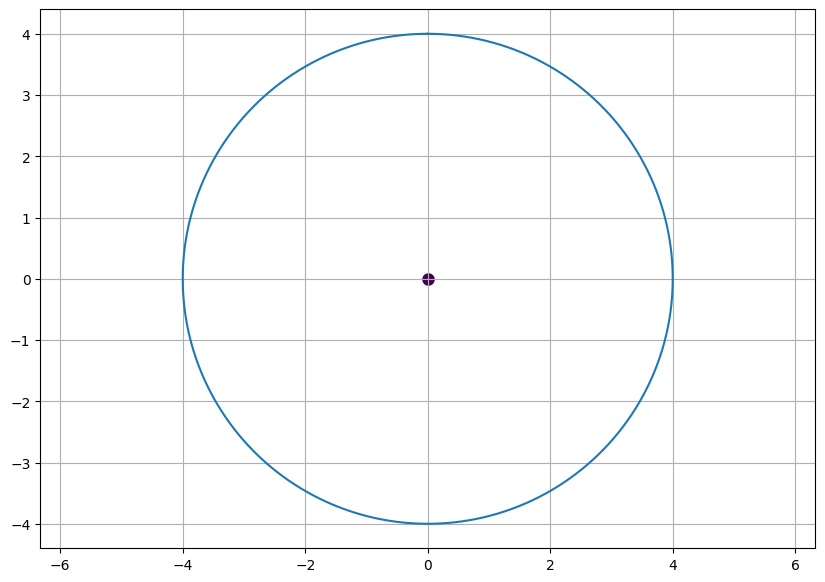

In [ ]:
%matplotlib inline
plt.figure(figsize=(10, 7))
r = 4
t = np.arange(0, 2*np.pi, 0.01)

x = r * np.sin(t)
y = r * np.cos(t)
plt.plot(x, y)
plt.scatter(0, 0, marker="o", c=r, lw=3)
plt.grid()
plt.axis('equal')
plt.show()

In [ ]:
# создание окружности

Circle(Point(0, 0), 4).equation()

x**2 + y**2 - 16

In [ ]:
print("Радиус окружности {}".format(Circle(Point(0, 0), 4).radius))
print("Центр окружности {}".format(Circle(Point(0, 0), 4).center))
print("Площадь круга {}".format(Circle(Point(0, 0), 4).area))
print("Длина окружности {}".format(Circle(Point(0, 0), 4).circumference))

Радиус окружности 4
Центр окружности Point2D(0, 0)
Площадь круга 16*pi
Длина окружности 8*pi


***Эллипс***

$\frac{(x-x_0)^2}{a^2} + \frac{(y-y_0)^2}{b^2} = 1$

параметрическая форма:

$x(t) = a\cdot sin(t)\\
y(t) = b\cdot cos(t)\\
t\in[0;2]\\
e = \sqrt{1 - \frac{b^2}{a^2}}$

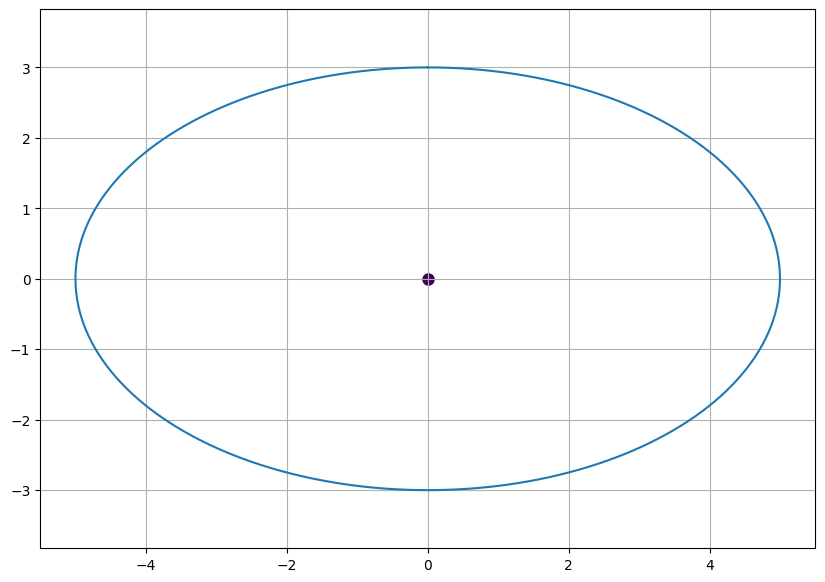

In [ ]:
%matplotlib inline
plt.figure(figsize=(10, 7))
a = 5
b = 3
t = np.arange(0, 2*np.pi, 0.01)

x = a * np.sin(t)
y = b * np.cos(t)
plt.plot(x, y)
plt.scatter(0, 0, marker="o", c=r, lw=3)
plt.grid()
plt.axis('equal')
plt.show()

In [ ]:
print("Эллипс {}".format(Ellipse(Point(3,1), hradius=3, eccentricity=Rational(4, 5))))
print("Уравнение эллипса {}".format(Ellipse(Point(3,1), hradius=3, eccentricity=Rational(4, 5)).equation()))
print("Параметрическое уравнение эллипса {}".format(Ellipse(Point(3,1), hradius=3, eccentricity=Rational(4, 5)).arbitrary_point()))
print("Площадь эллипса {}".format(Ellipse(Point(3,1), hradius=3, eccentricity=Rational(4, 5)).area))

Эллипс Ellipse(Point2D(3, 1), 3, 9/5)
Уравнение эллипса (x/3 - 1)**2 + (5*y/9 - 5/9)**2 - 1
Параметрическое уравнение эллипса Point2D(3*cos(t) + 3, 9*sin(t)/5 + 1)
Площадь эллипса 27*pi/5


***Парабола***

$y^2 = 2\cdot p \cdot x$

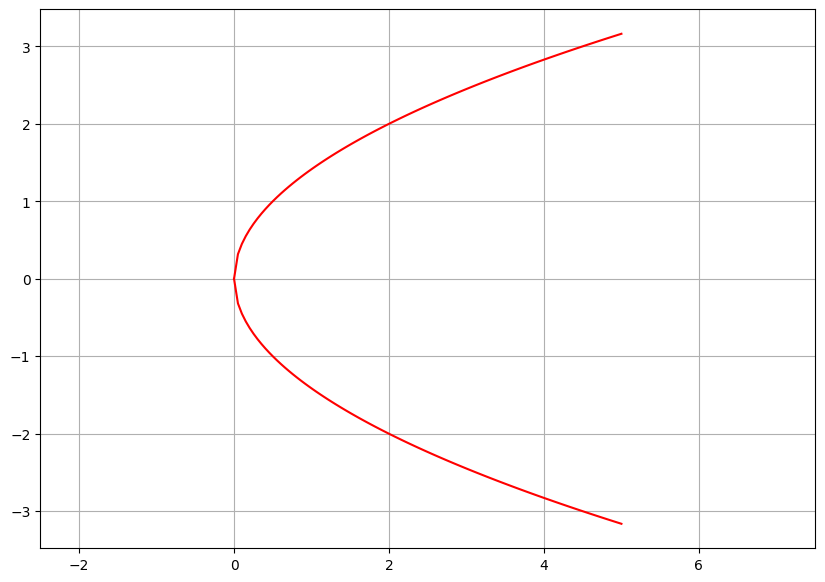

In [ ]:
%matplotlib inline
plt.figure(figsize=(10, 7))
x = np.linspace(0, 5, 100)
y1 = np.sqrt(2 * x)
y2 = - np.sqrt(2 * x)
plt.plot(x, y1, c='r')
plt.plot(x, y2, c='r')
plt.grid()
plt.axis('equal')
plt.show()

In [ ]:
print("Создание параболы {}".format(Parabola(Point(0, 0), Line(Point(5, 8), Point(7, 8))).equation()))

Создание параболы -x**2 - 16*y + 64


***Гипербола***

$\frac{(x-x_0)^2}{a^2} + \frac{(y-y_0)^2}{b^2} = 1$

параметрическая форма:

$x(t) = a\cdot sin(t)\\
y(t) = b\cdot cos(t)\\
t\in[0;2]\\
e = \sqrt{1 - \frac{b^2}{a^2}}$

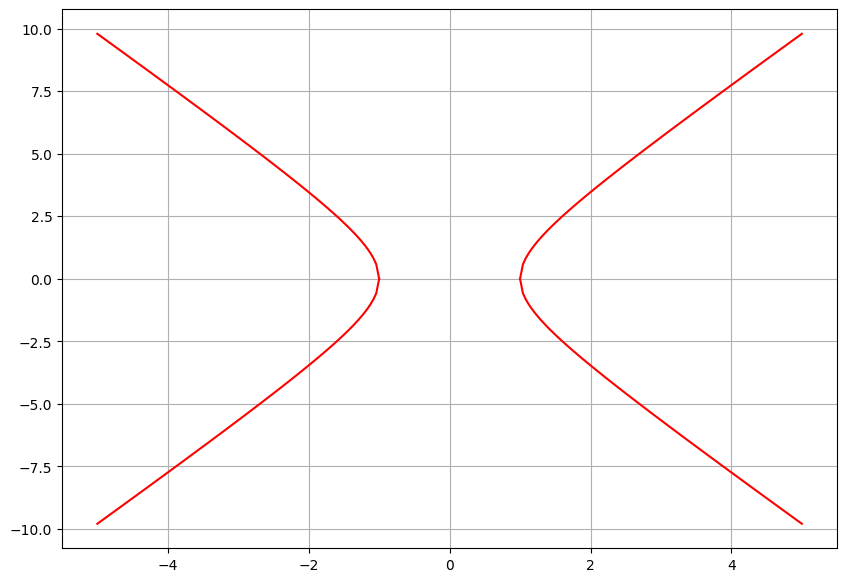

In [ ]:
%matplotlib inline
plt.figure(figsize=(10, 7))
x1 = np.linspace(-5, -1, 100)
y1 = 2*np.sqrt(x1**2 - 1)
y2 = - 2*np.sqrt(x1**2-1)

x2 = np.linspace(1, 5, 100)
y3 = 2*np.sqrt(x2**2 - 1)
y4 = - 2*np.sqrt(x2**2-1)
plt.plot(x1, y1, c='r')
plt.plot(x1, y2, c='r')
plt.plot(x2, y3, c='r')
plt.plot(x2, y4, c='r')
plt.grid()
#plt.axis('equal')
plt.show()

### Поверхности второго порядка

*Уравнение поверхностей второго порядка*

$a_{11}x^2 + 2a_{12}xy + 2a_{13}xz+ a_{22}y^2 + 2a_{23}yz + 2a_{33}z^2 + 2a_{14}x + 2a_{24}y + 2a_{34}z + a_{44} = 0$

$Δ =
\begin{vmatrix}
a_{11} & a_{12} & a_{13} & a_{14}\\
a_{21} & a_{22} & a_{23} & a_{24}\\
a_{31} & a_{32} & a_{33} & a_{34}\\
a_{41} & a_{42} & a_{43} & a_{44}
\end{vmatrix}$


$δ =
\begin{vmatrix}
a_{11} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{23}\\
a_{31} & a_{32} & a_{33}
\end{vmatrix}$

$I_1 = a_{11} + a_{22} + a_{33}$

$I_2 =
\begin{vmatrix}
a_{11} & a_{12}\\
a_{12} & a_{22}
\end{vmatrix} +
\begin{vmatrix}
a_{22} & a_{23}\\
a_{23} & a_{33}
\end{vmatrix} +
\begin{vmatrix}
a_{33} & a_{13}\\
a_{13} & a_{11}
\end{vmatrix}
$

$K_1 =
\begin{vmatrix}
a_{11} & a_{14}\\
a_{14} & a_{44}
\end{vmatrix} +
\begin{vmatrix}
a_{22} & a_{24}\\
a_{24} & a_{44}
\end{vmatrix} +
\begin{vmatrix}
a_{33} & a_{34}\\
a_{34} & a_{44}
\end{vmatrix}
$

$K_2 =
\begin{vmatrix}
a_{11} & a_{12} & a_{14}\\
a_{12} & a_{22} & a_{24}\\
a_{14} & a_{24} & a_{44}
\end{vmatrix} +
\begin{vmatrix}
a_{11} & a_{13} & a_{14}\\
a_{13} & a_{33} & a_{34}\\
a_{14} & a_{34} & a_{44}
\end{vmatrix} +
\begin{vmatrix}
a_{22} & a_{23} & a_{24}\\
a_{23} & a_{33} & a_{34}\\
a_{24} & a_{34} & a_{44}
\end{vmatrix}
$

*Классификация поверхностей*

Элипсоид: $\frac{x^2}{a^2}+\frac{y^2}{b^2}+\frac{z^2}{c^2} = 1$

Параметрическое уравнение элипсоида:
$x = a \cdot cos(θ) \cdot sin(ϕ)$

$y = b \cdot cos(θ) \cdot sin(ϕ)$

$z = c \cdot cos(θ)$

$0 \leq θ \leq π; \space 0 \leq ϕ \leq 2π$

Однополосный гиперболоид: $\frac{x^2}{a^2}+\frac{y^2}{b^2}-\frac{z^2}{c^2} = 1$

Двуполосный гиперболоид: $\frac{x^2}{a^2}+\frac{y^2}{b^2}-\frac{z^2}{c^2} = -1$

Конус: $\frac{x^2}{a^2}+\frac{y^2}{b^2}-\frac{z^2}{c^2} = 0$

Элиптический парабалоид: $\frac{x^2}{a^2}+\frac{y^2}{b^2} = z$

Гиперболический параболоид: $\frac{x^2}{a^2}-\frac{y^2}{b^2} = z$

Эллиптический цилиндр: $\frac{x^2}{a^2}+\frac{y^2}{b^2} = 1$

Гиперболический цилиндр: $\frac{x^2}{a^2}-\frac{y^2}{b^2} = 1$

Параболический цилиндр: $y^2 = 2 px$

Пара пересекающихся плоскостей: $\frac{x^2}{a^2}-\frac{y^2}{b^2} = 0$

Пара параллельных плоскостей: $y^2 = a^2$

Пара совпадающих плоскостей: $y^2 = 0$

Мнимый элипсоид: $\frac{x^2}{a^2}+\frac{y^2}{b^2}+\frac{z^2}{c^2} = -1$

Мнимый конус: $\frac{x^2}{a^2}+\frac{y^2}{b^2}+\frac{z^2}{c^2} = -1$

Мнимый элиптический цилиндр: $\frac{x^2}{a^2}+\frac{y^2}{b^2} = -1$

Пара мнимый пересекающихся плоскостей: $\frac{x^2}{a^2}+\frac{y^2}{b^2} = 0$

Пара мнимый параллельных плоскостей: $y^2 = - a^2$

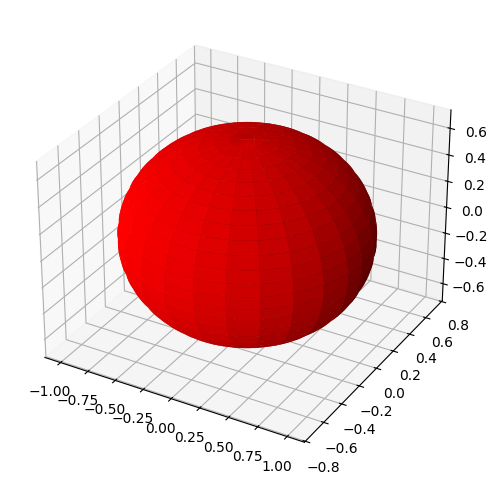

In [ ]:
# элипсоид

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')

a, b, c = 1, 1/np.sqrt(2), 1/np.sqrt(2)

theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2 * np.pi, 100)

x = a * np.outer(np.cos(phi), np.sin(theta))
y = b * np.outer(np.sin(phi), np.sin(theta))
z = c * np.outer(np.ones(np.size(phi)), np.cos(theta))

ax.plot_surface(x, y, z, rstride=4, cstride=4, color='r')

plt.show()

In [ ]:
# вывести параметрическое уравнение элипсоида

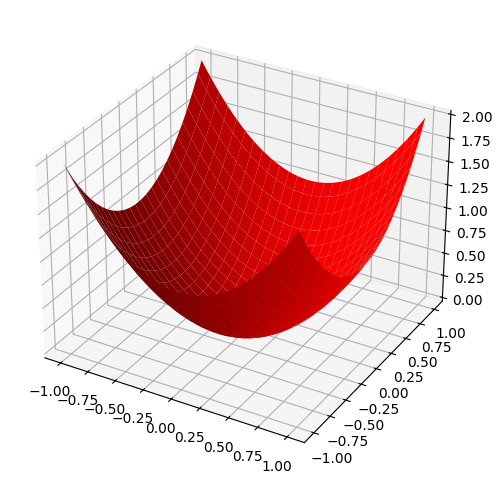

In [ ]:
# эллиптический парабалоид

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')

x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
[x, y] = np.meshgrid(x, y)

z = lambda w: w[0]**2 + w[1]**2
z = z((x, y))
ax.plot_surface(x, y, z, rstride=4, cstride=4, color='r')
plt.show()

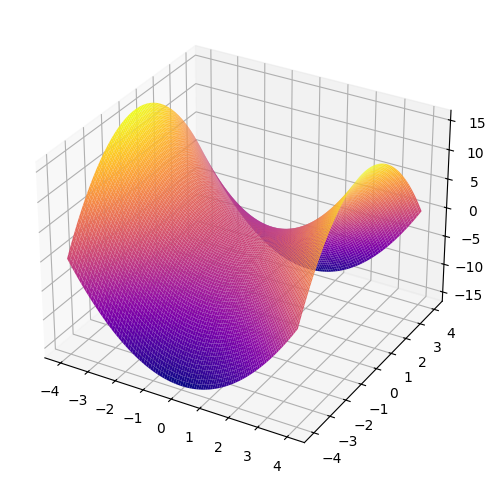

In [ ]:
# гиперболический парабалоид

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(projection="3d")

x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
[x, y] = np.meshgrid(x, y)
f = lambda w: w[0]**2 - w[1]**2
z = f((x, y))

ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap="plasma")

plt.show()

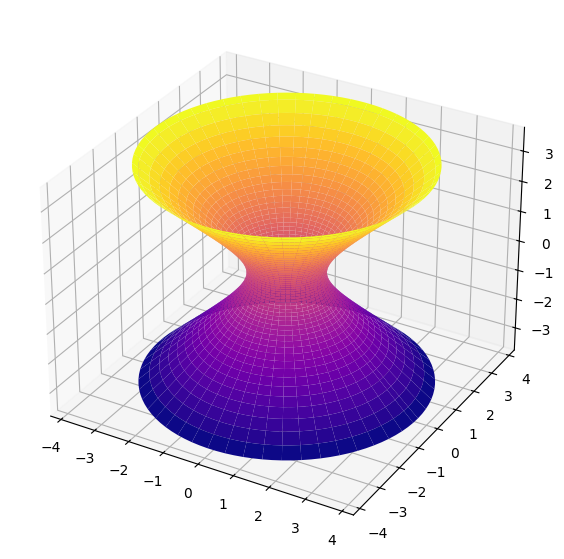

In [ ]:
# однополосный гиперболоид

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection='3d')

lam = np.linspace(-2, 2, 100)
theta = np.linspace(0, 2*np.pi, 100)
[lam, theta] = np.meshgrid(lam, theta)

x = np.cosh(lam) * np.cos(theta)
y = np.cosh(lam) * np.sin(theta)
z = np.sinh(lam)

ax.plot_surface(x,y,z, cmap='plasma')

plt.show()

In [ ]:
# вывести параметрическую формулу однополосного гиперболоида

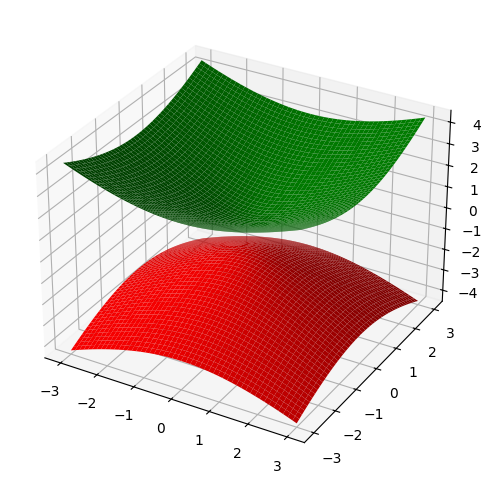

In [ ]:
# двуполосный гиперболоид

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')

x = np.linspace(-3, 3, 500)
y = np.linspace(-3, 3, 500)
[x, y] = np.meshgrid(x, y)

f = lambda w: np.sqrt(w[0]**2 + w[1]**2 + 1)
z1 = f((x, y))
z2 = -f((x, y))
ax.plot_surface(x, y, z1, color='g')
ax.plot_surface(x, y, z2, color='r')

plt.show()

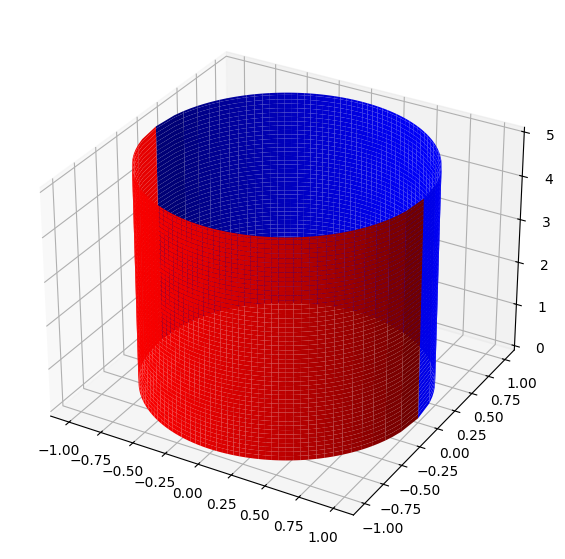

In [ ]:
# элиптический цилиндр

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-1, 1, 100)
z = np.linspace(0, 5, 100)
[x, z] = np.meshgrid(x, z)
y = np.sqrt(1 - x**2)
ax.plot_surface(x, y, z, color='b')
ax.plot_surface(x, -y, z, color='r')

plt.show()

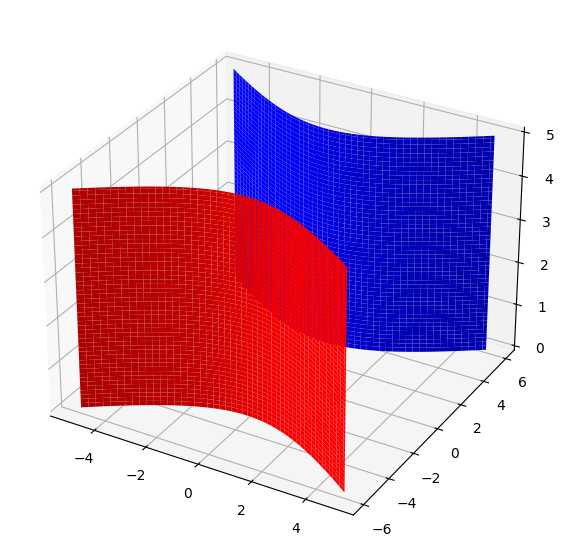

In [ ]:
# гиперболический цилиндр

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-5, 5, 100)
z = np.linspace(0, 5, 100)
[x, z] = np.meshgrid(x, z)
y = np.sqrt(10 + x**2)
ax.plot_surface(x, y, z, color='b')
ax.plot_surface(x, -y, z, color='r')

plt.show()

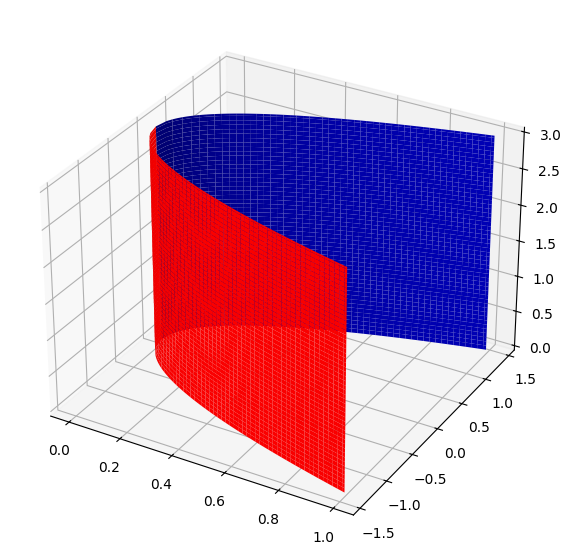

In [ ]:
# параболический цилиндр

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(0, 1, 100)
z = np.linspace(0, 3, 100)
[x, z] = np.meshgrid(x, z)
y = np.sqrt(2*x)
ax.plot_surface(x, y, z, color='b')
ax.plot_surface(x, -y, z, color='r')

plt.show()

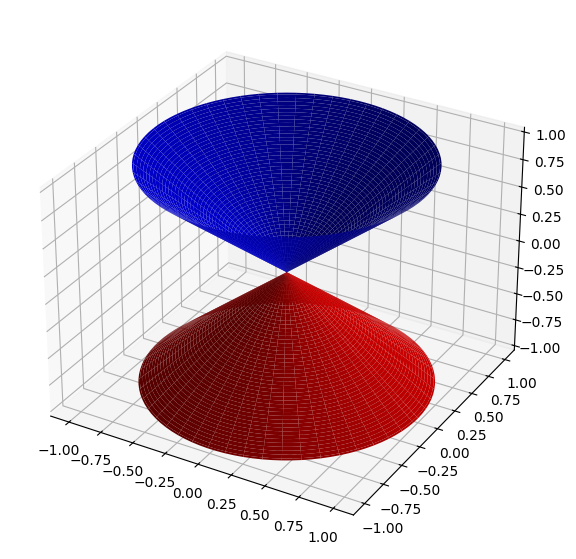

In [ ]:
# конус

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

theta = np.linspace(0, 2*np.pi, 100)
r = np.linspace(0, 1, 100)
[theta, r] = np.meshgrid(theta, r)

x = r * np.cos(theta)
y = r * np.sin(theta)
z1 = r
z2 = -r
ax.plot_surface(x, y, z1, color='b')
ax.plot_surface(x, y, z2, color='r')

plt.show()

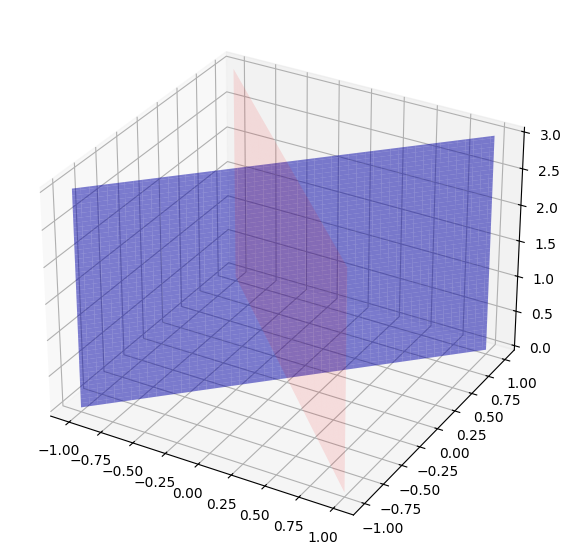

In [ ]:
# пара пересекающихся плоскостей

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-1, 1, 100)
z = np.linspace(0, 3, 100)
[x, z] = np.meshgrid(x, z)
y = x
ax.plot_surface(x, y, z, color='b', alpha=0.5)
ax.plot_surface(x, -y, z, color='r', alpha=0.1)

plt.show()

In [ ]:
# постороить линию пересечения данных плоскостей

### Алгебра матриц. Системы линейных уравнений

In [ ]:
# создание матрицы

A = np.array([[1, 2, 3],
             [3, 4, 5],
             [5, 6, 7]])
A

array([[1, 2, 3],
       [3, 4, 5],
       [5, 6, 7]])

In [ ]:
# единичная матрица

I = np.eye(5)
I

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
# матрица-строка

A = np.array([1, 2, 3])
A

array([1, 2, 3])

In [ ]:
# поэлементной умножение *

A = np.array([[1,2,3],[3,4,5],[5,6,7]])
B = np.array([[1,2,3],[3,4,5],[5,6,7]])

A * B

array([[ 1,  4,  9],
       [ 9, 16, 25],
       [25, 36, 49]])

In [ ]:
# трнаспонирование

B = np.array([[1,2,3],[3,4,5],[5,6,7]])
B.T

array([[1, 3, 5],
       [2, 4, 6],
       [3, 5, 7]])

In [ ]:
# умножение матриц @, np.dot

A@B == np.dot(A, B), B.T@A == np.dot(A, B.T)

(array([[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]]),
 array([[False, False, False],
        [False, False, False],
        [False, False, False]]))

In [ ]:
# определитель матрицы

C = np.array([[-1,2,3],[3,4,5],[5,6,7]])
np.linalg.det(C)

np.float64(4.0)

In [ ]:
# обратная матрица

np.linalg.inv(A)

array([[-0.5,  1. , -0.5],
       [ 1. , -5.5,  3.5],
       [-0.5,  4. , -2.5]])

In [ ]:
# ранг матрицы

np.linalg.matrix_rank(A)

np.int64(2)

In [ ]:
# sympy

A = Matrix([[1,2,3], [3, 4, 5]])
A

Matrix([
[1, 2, 3],
[3, 4, 5]])

In [ ]:
eye(5)

Matrix([
[1, 0, 0, 0, 0],
[0, 1, 0, 0, 0],
[0, 0, 1, 0, 0],
[0, 0, 0, 1, 0],
[0, 0, 0, 0, 1]])

In [ ]:
zeros(4)

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [ ]:
ones(4)

Matrix([
[1, 1, 1, 1],
[1, 1, 1, 1],
[1, 1, 1, 1],
[1, 1, 1, 1]])

In [ ]:
diag(1,2,3,4)

Matrix([
[1, 0, 0, 0],
[0, 2, 0, 0],
[0, 0, 3, 0],
[0, 0, 0, 4]])

In [ ]:
# остальные методы https://docs.sympy.org/latest/tutorials/intro-tutorial/matrices.html

In [ ]:
M = Matrix([[3, -2,  4, -2], [5,  3, -3, -2], [5, -2,  2, -2], [5, -2, -3,  3]])

In [ ]:
M.shape, M.rank()

((4, 4), 4)

In [ ]:
# базис системы векторов - максимальная независимая подсистема данной системы

A = Matrix([[1,2,3],[3,4,5],[5,6,7]])
A.T.columnspace(), A.T.rref()

([Matrix([
  [1],
  [2],
  [3]]),
  Matrix([
  [3],
  [4],
  [5]])],
 (Matrix([
  [1, 0, -1],
  [0, 1,  2],
  [0, 0,  0]]),
  (0, 1)))

**Системы линейных уравнений**

*Пример 1:* Решить систему линейных уравнений

$
\begin{cases}
3x + 2y = 2\\
x - y = 4\\
5y + z = -1
\end{cases}
$

Другая интерпритация данной задачи: разложить вектор $a = [2, 4, 01]$ по системе векторов

$
e_1: [3, 1, 0]
e_2: [2, -1, 5]
e_3: [0, 0, 1]
$

соответственно: $a = M(e_1, e_2, e_3) \cdot x$

$x = F^{-1} \cdot a$

In [ ]:
A = np.array([[3,2,0], [1, -1, 0], [0, 5, 1]])
B = np.array([2, 4, -1])

res = np.linalg.solve(A, B)
res

array([ 2., -2.,  9.])

In [ ]:
np.dot(A, res) == B

array([ True,  True,  True])

In [ ]:
A = Matrix([[3,2,0], [1, -1, 0], [0, 5, 1]])
B = Matrix([2, 4, -1])

res = A.inv() * B
res

Matrix([
[ 2],
[-2],
[ 9]])

*Пример 2:* найти общее решение системы уравнений

$
\begin{cases}
x_1 + x_2 + 3x_3 = 18\\
2x_1 - x_2 + 9x_3 = 30
\end{cases}
$

In [ ]:
M = Matrix([[1, 1, 3], [2, -1, 9]])
M.rank()

2

In [ ]:
M.columnspace()
# x1, x2 - базисные переменные

[Matrix([
 [1],
 [2]]),
 Matrix([
 [ 1],
 [-1]])]

In [ ]:
x1, x2, x3 = symbols('x1 x2 x3')
y1 = x1 + x2 + 3*x3 - 18
y2 = 2*x1 - x2 + 9*x3 - 30
linsolve([y1, y2], [x1, x2])

{(16 - 4*x3, x3 + 2)}

In [ ]:
M.rref()

(Matrix([
 [1, 0,  4],
 [0, 1, -1]]),
 (0, 1))

**Пример 3:** найти общее решение систему уравнений

$
\begin{cases}
x_1 - 2x_2 + 4x_3 = 6\\
x_1 - x_2 + x_3 = 4\\
-3x_1 + 6x_2 - 12x_3 = 18
\end{cases}
$

In [ ]:
# @title

M = Matrix([[1, -2, 4], [1, -1, 1], [-3, 6, -12]])
M.rank()
M.rref()

(Matrix([
 [1, 0, -2],
 [0, 1, -3],
 [0, 0,  0]]),
 (0, 1))

**Пример 4:** решить систему линейных уравнений

$
\begin{cases}
x_1 + 2x_2 + 3x_3 = 3\\
4x_1 + 5x_2 + 6x_3 = 6\\
7x_1 + 8x_2 + 10x_3 = 9
\end{cases}
$

In [ ]:
# @title

M = Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 10]])
M.rank()

B = Matrix([3, 6, 9])
linsolve((M, B))

{(-1, 2, 0)}

**Пример 5:** решить систему линейных уравнений

$
\begin{cases}
x_1 + 2x_2 + 3x_3 = 3\\
4x_1 + 5x_2 + 6x_3 = 6\\
7x_1 + 8x_2 + 9x_3 = 9
\end{cases}
$

In [ ]:
# @title

M = Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
M.rank()

B = Matrix([3, 6, 9])
linsolve((M, B))

{(tau0 - 1, 2 - 2*tau0, tau0)}

In [ ]:
A = M.col_insert(3, B)

linsolve(A)

{(tau0 - 1, 2 - 2*tau0, tau0)}

**Однородные системы уравнений** - все свободный члены равны нулю

Базис - набор линейно независимых ненулевых решений, через которые можно выразить все остальные решения

**Пример 6:** решить систему линейных однородных уравнений

$
\begin{cases}
x_1 - x_2 + 2x_3 = 0\\
4x_1 + x_2 - 3x_3 = 0\\
7x_1 + 2x_2 = 0
\end{cases}
$

In [ ]:
M = Matrix([[1, -1, 2, 0], [2, 1, -3, 0], [3, 2, 0, 0]])
print(M.rank())

linsolve(M)

3


{(0, 0, 0)}

**Пример 6:** решить систему линейных однородных уравнений

$
\begin{cases}
x_1 + 3x_2 + 4x_3 - 2x_4 = 0\\
5x_2 + 7x_3 - 4x_4 = 0\\
x_1 + 8x_2 + 11x_3 - 6x_4 = 0\\
-x_1 + 2x_2 + 3x_3 - 2x_4= 0
\end{cases}
$

In [ ]:
M = Matrix([[1, 3, 4, -2], [0, 5, 7, -4], [1, 8, 11, -6]])
M.rank()

2

In [ ]:
M.nullspace()

[Matrix([
 [ 1/5],
 [-7/5],
 [   1],
 [   0]]),
 Matrix([
 [-2/5],
 [ 4/5],
 [   0],
 [   1]])]

In [ ]:
M_ful = M.col_insert(4, Matrix([0, 0, 0]))
linsolve(M_ful)

{(tau0/5 - 2*tau1/5, -7*tau0/5 + 4*tau1/5, tau0, tau1)}

## **Домашнее задание 3.2**

*Пример 1: * рассчитать параметры $δ, I_1, I_2, K_1, K_2$ для каждой поверхности второго порядка (за исключением мнимых)

# Семинра №3

**Матрицы. Системы линейных уравнений**

In [3]:
A = np.array([[-7, 4, 0],
              [0, -1, 0],
              [-1, 5, 7]])
A

array([[-7,  4,  0],
       [ 0, -1,  0],
       [-1,  5,  7]])

In [4]:
E = np.eye(3)
E

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [5]:
A = np.array([1,2,3])
A

array([1, 2, 3])

In [7]:
# сложение, вычитание, умножение на скаляр
A = np.array([[1, 2, 3],
              [3, 2, 1],
              [4, 5, 6]])
E = np.eye(3)
A - E, A + E, A * 2

(array([[0., 2., 3.],
        [3., 1., 1.],
        [4., 5., 5.]]),
 array([[2., 2., 3.],
        [3., 3., 1.],
        [4., 5., 7.]]),
 array([[ 2,  4,  6],
        [ 6,  4,  2],
        [ 8, 10, 12]]))